In [2]:
using Revise
using SSMC, SSMC.BasicMiCRM

Precompiling packages...
  33808.3 ms  ✓ SSMC
  1 dependency successfully precompiled in 39 seconds. 560 already precompiled.


In [3]:
using CairoMakie, ProgressLogging

In [4]:
using Base.Threads; nthreads()

18

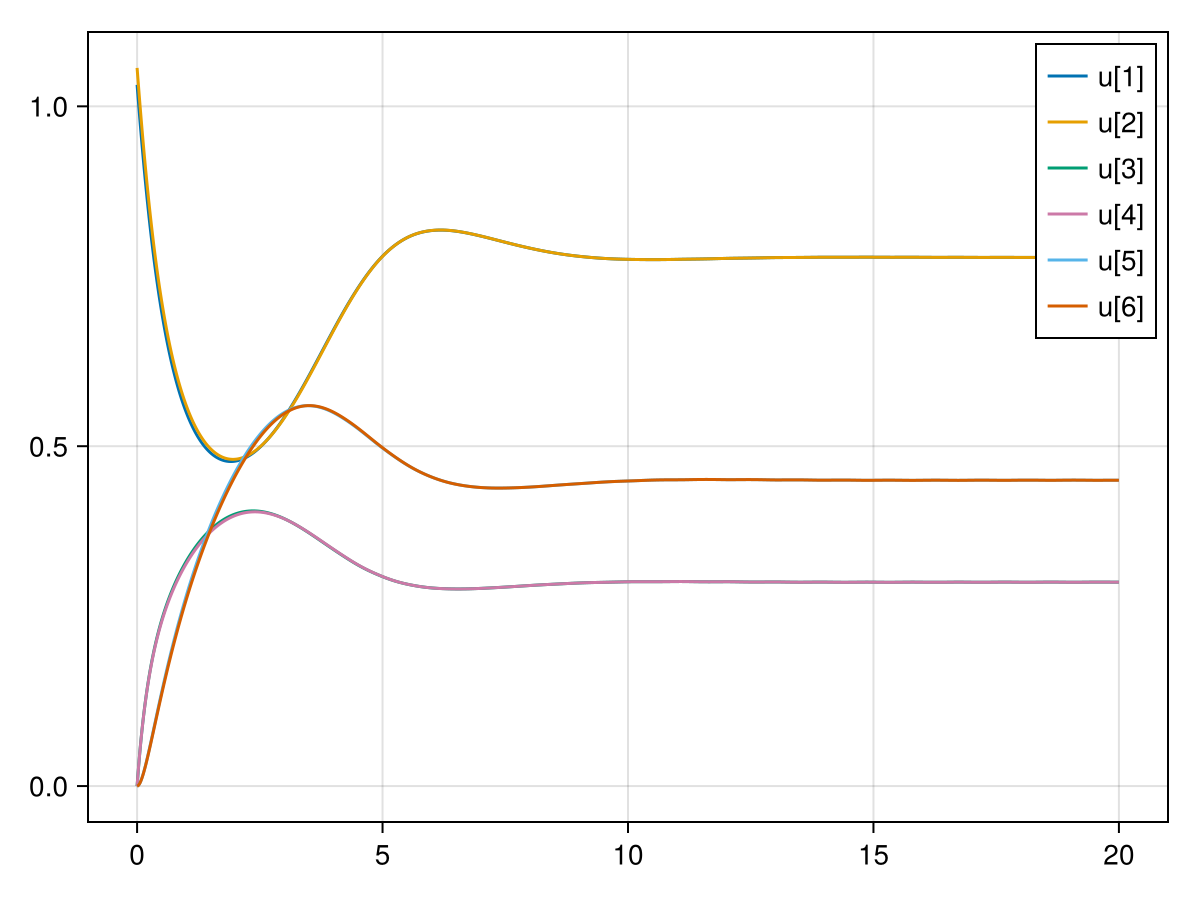

2×4 SMatrix{2, 4, Float64, 8} with indices SOneTo(2)×SOneTo(4):
 3.0  0.0  2.0  0.0
 0.0  3.0  0.0  2.0

4×4 SMatrix{4, 4, Float64, 16} with indices SOneTo(4)×SOneTo(4):
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0
 1.0  0.0  0.0  0.0

In [5]:
p, s = make_solve_plot_return(2,4,20;
    D=[0. 0. 0. 0.; 0. 0. 0. 0.; 0. 1. 0. 0.; 1. 0. 0. 0.],
    K=[1., 1., 0., 0.],
    r=[1., 1., 0., 0.],
    l=[1., 1., 0., 0.],
    c=[3. 0. 2. 0.; 0. 3. 0. 2.],
    m=[0.9, 0.9],
    u0=[1.,1.,0.,0.,0.,0.],
    u0rand=0.1
)
display(p.p.c)
display(p.p.D)

In [6]:
solve(SteadyStateProblem(p), DynamicSS())

retcode: Success
u: 6-element Vector{Float64}:
 0.7777778497797527
 0.7777778497798247
 0.30000003625397403
 0.3000000362539282
 0.44999967548116515
 0.4499996754810136